In [1]:
import numpy as np
from matplotlib import cbook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

In [2]:
def get_demo_image():
    z = cbook.get_sample_data("axes_grid/bivariate_normal.npy", np_load=True)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)

In [3]:
def add_sizebar(ax, size):
    asb = AnchoredSizeBar(
        ax.transData, size, str(size), loc=8,
        pad=0.1, borderpad=0.5, sep=5, frameon=False,
    )
    ax.add_artist(asb)

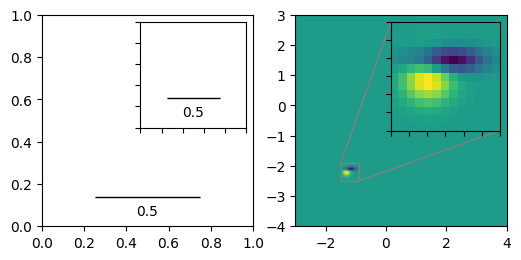

In [4]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=[6, 3])

# First subplot, showing an inset with a size bar.
ax.set_aspect(1)

axins = zoomed_inset_axes(ax, zoom=0.5, loc="upper right")
# fix the number of ticks on the inset axes
axins.yaxis.get_major_locator().set_params(nbins=7)
axins.xaxis.get_major_locator().set_params(nbins=7)
axins.tick_params(labelleft=False, labelbottom=False)

add_sizebar(ax, 0.5)
add_sizebar(axins, 0.5)

# Second subplot, showing an image with an inset zoom
# and a marked inset
Z, extent = get_demo_image()
Z2 = np.zeros((150, 150))
ny, nx = Z.shape
Z2[30:30+ny, 30:30+nx] = Z

ax2.imshow(Z2, extent=extent, origin="lower")

axins2 = zoomed_inset_axes(ax2, zoom=6, loc=1)
axins2.imshow(Z2, extent=extent, origin="lower")

# sub region of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins2.set_xlim(x1, x2)
axins2.set_ylim(y1, y2)
# fix the number of ticks on the inset axes
axins2.yaxis.get_major_locator().set_params(nbins=7)
axins2.xaxis.get_major_locator().set_params(nbins=7)
axins2.tick_params(labelleft=False, labelbottom=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax2, axins2, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()